# SPAIN ELECTRICTY SHORTFALL PREDICT NOTEBOOK



# Problem Statement




##### There is evidence that the reliance on purely non-renewable fossil-fuel energy sources is unsustainable. Transitioning into renewable  energy sources is simply inevitable. 

##### By analyzing the effect of different weather features with time on energy supplied, this project is aimed helping the Spanish government predict future energy deficit from renewable resources and leverage data-driven solutions to model shortfall between the energy produced by fossil fuels and proffer sustainable renewable alternatives so as to accommodate for deficits in the power grid. 

##### We begin with importing necessary libraries which will be needed throughout this work


In [1]:
# Importing the Pandas and Numpy libraries for accessing and wrangling the dataset
import pandas as pd
import numpy as np

# Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# Linear regressions
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge

# Metrics and Preprocessing libraries
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Ensemble methods
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

# Handling warnings
import warnings
warnings.filterwarnings('ignore')

##### Now we proceed with loading our `Train` and `Test` dataset respectively

In [2]:
train_df = pd.read_csv("Dataset/df_train.csv")
test_df = pd.read_csv("Dataset/df_test.csv")

##### Having imported the `Train` and `Test` datasets, next is to inspect the top and bottom 5 rows to get an overview

In [3]:
train_df.head() 

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
train_df.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000
8762,8762,2017-12-31 21:00:00,4.333333,level_9,0.0,7.000000,78.666667,68.666667,20.000000,1.666667,...,282.150000,287.483333,276.816667,281.020000,287.150000,285.150000,287.483333,281.396667,280.483333,2780.666667


In [5]:
train_df.shape #Inspecting the Diemnsion of the data

print ('The Train data has {} rows and {} columns'.format(train_df.shape[0], train_df.shape[1]))

The Train data has 8763 rows and 49 columns


In [6]:
test_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [7]:
test_df.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333


In [8]:
test_df.shape #Inspecting the Diemnsion of the data

print ('The Test data has {} rows and {} columns'.format(test_df.shape[0], test_df.shape[1]))

The Test data has 2920 rows and 48 columns


##### Having had an overview of the dataset, let's drill in with some `summary statistics`

In [9]:
#To access the count, average, standard deviation and 5 point summary

train_df.describe().T.sort_index() 

,count,mean,std,min,25%,50%,75%,max
Barcelona_pressure,8763.0,1377.964605,14073.140990,670.666667,1014.000000,1018.000000,1022.000000,1.001411e+06
Barcelona_rain_1h,8763.0,0.128906,0.634730,0.000000,0.000000,0.000000,0.000000,1.200000e+01
Barcelona_rain_3h,8763.0,0.000439,0.003994,0.000000,0.000000,0.000000,0.000000,9.300000e-02
Barcelona_temp,8763.0,289.855459,6.528111,270.816667,284.973443,289.416667,294.909000,3.073167e+02
Barcelona_temp_max,8763.0,291.157644,7.273538,272.150000,285.483333,290.150000,296.855000,3.140767e+02
Barcelona_temp_min,8763.0,288.447422,6.102593,269.483333,284.150000,288.150000,292.966667,3.048167e+02
Barcelona_weather_id,8763.0,765.979687,88.142235,200.666667,800.000000,800.333333,801.000000,8.040000e+02
Barcelona_wind_deg,8763.0,190.544848,89.077337,0.000000,118.166667,200.000000,260.000000,3.600000e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02


In [10]:
test_df.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
Barcelona_pressure,2920.0,1015.317123,7.021445,988.333333,1012.000000,1016.000000,1019.333333,1037.000000
Barcelona_rain_1h,2920.0,0.047397,0.162474,0.000000,0.000000,0.000000,0.000000,2.300000
Barcelona_rain_3h,2920.0,0.000006,0.000217,0.000000,0.000000,0.000000,0.000000,0.009667
Barcelona_temp,2920.0,289.911289,7.119411,272.650000,284.307500,289.483333,295.816667,308.150000
Barcelona_temp_max,2920.0,290.695462,7.113599,273.816667,284.816667,290.150000,296.483333,309.483333
Barcelona_temp_min,2920.0,289.124971,7.168049,271.483333,283.483333,288.816667,295.150000,306.816667
Barcelona_weather_id,2920.0,760.473307,98.009846,207.333333,800.000000,800.000000,801.000000,804.000000
Barcelona_wind_deg,2920.0,178.979452,86.976503,0.000000,113.333333,176.666667,253.333333,343.333333
Barcelona_wind_speed,2920.0,2.518094,1.625507,0.000000,1.333333,2.000000,3.666667,12.666667
Bilbao_clouds_all,2920.0,43.355422,30.486298,0.000000,13.333333,45.000000,75.000000,97.333333


##### Looking out for unique or duplicate values on the train columns

In [11]:
train_df.nunique().count() 

49

###### And all features on the train set were found to be `unique` with no `duplicate` features

##### Next we can proceed to inspecting datatypes and looking out for missing values

In [12]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

##### Oops! Index 29, that is the `Valencia_pressure` column tend to have missing values on both the train and test data



In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

##### Looking at the `Kurtosis`, it could be deduced that a couple of the snow and rainfall data contains outliers

##### Let's confirm that with a Boxplot

In [14]:
train_df.kurtosis() #Checking Kurtosis for outliers

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

<AxesSubplot:>

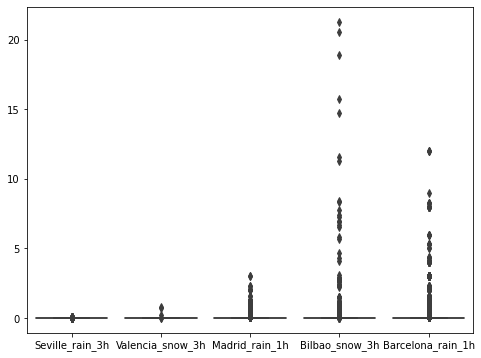

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train_df[['Seville_rain_3h', 'Valencia_snow_3h', 'Madrid_rain_1h', 'Bilbao_snow_3h', 'Barcelona_rain_1h']])

##### From the `Boxplot`, it could be seen that the above features contains series of `outlier` data and should be paid attention to subsequently

In [16]:
train_df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

In [17]:
train_df.isnull().sum() #Inspecting number of missing values per features

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

##### The `Valencia_pressure` column has `2068` data missing from its column

<AxesSubplot:>

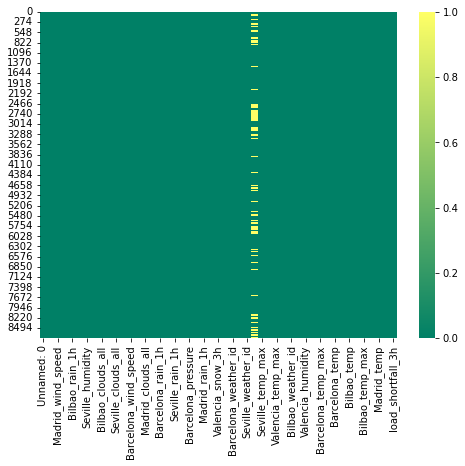

In [18]:
plt.figure(figsize=(8,6)) #visualizing to see potential columns with missing values
sns.heatmap(train_df.isnull(), cmap='summer')

# Data Cleaning

##### Since we've been able to identify the sole column with missing values (`Valencia_pressure`), we can proceed with filling it up



<AxesSubplot:xlabel='Valencia_pressure'>

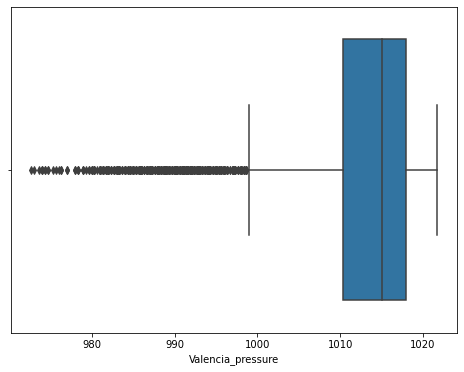

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(train_df['Valencia_pressure'] )

##### And since the `Valencia_pressure` has alot of outlier data as seen above and is of numerical (float) datatype, it will be inapropriate to `fill missing values with` the Mean value (since Mean is sensitive to outliers). We would fill with `Zeros` instead

In [20]:
train_df.Valencia_pressure = train_df.Valencia_pressure.replace(np.nan, 0)

In [21]:
train_df['Valencia_pressure'] 

0       1002.666667
1       1004.333333
2       1005.333333
3       1009.000000
4          0.000000
           ...     
8758       0.000000
8759    1021.000000
8760    1009.666667
8761    1020.000000
8762       0.000000
Name: Valencia_pressure, Length: 8763, dtype: float64

##### And we have our column fixed up!

<AxesSubplot:>

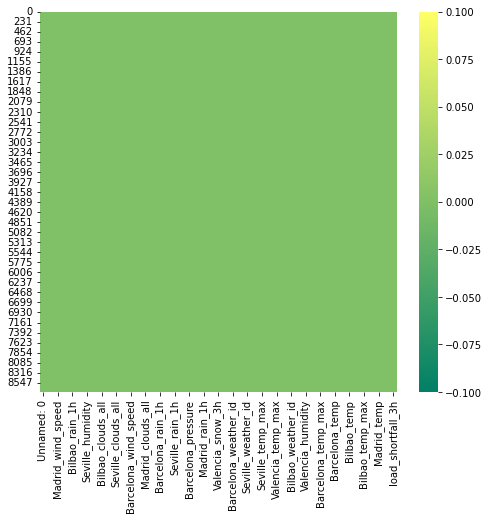

In [22]:
plt.figure(figsize=(8,7))
sns.heatmap(train_df.isnull(), cmap='summer')

# Feature Engineering

##### Next, we shall proceed with converting the rest of our columns into numerical datatype for ease of moedlling

In [23]:
train_df['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
8758     level_6
8759     level_6
8760     level_9
8761     level_8
8762     level_9
Name: Valencia_wind_deg, Length: 8763, dtype: object

##### Since majority of the `city_wind_degs` are in numericals, we shall convert `Valencia_wind_deg` also to numerical (int) datatype

In [24]:
train_df.Valencia_wind_deg = train_df.Valencia_wind_deg.str.extract('(\d+)')
train_df.Valencia_wind_deg = pd.to_numeric(train_df.Valencia_wind_deg)

In [25]:
train_df['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

##### Similarly, we would need to convert the `Seville_pressure` column also to numerical datatype

In [26]:
train_df['Seville_pressure']

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
8758    sp23
8759    sp23
8760    sp22
8761    sp23
8762    sp25
Name: Seville_pressure, Length: 8763, dtype: object

In [27]:
train_df['Seville_pressure'] = train_df['Seville_pressure'].str.extract('(\d+)')
train_df['Seville_pressure'] = pd.to_numeric(train_df['Seville_pressure'])

In [28]:
train_df.Seville_pressure

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

##### And now, let's inspect what weather variables from across the 5 Spanish cities are correlated and at what magnitude or direction

<AxesSubplot:>

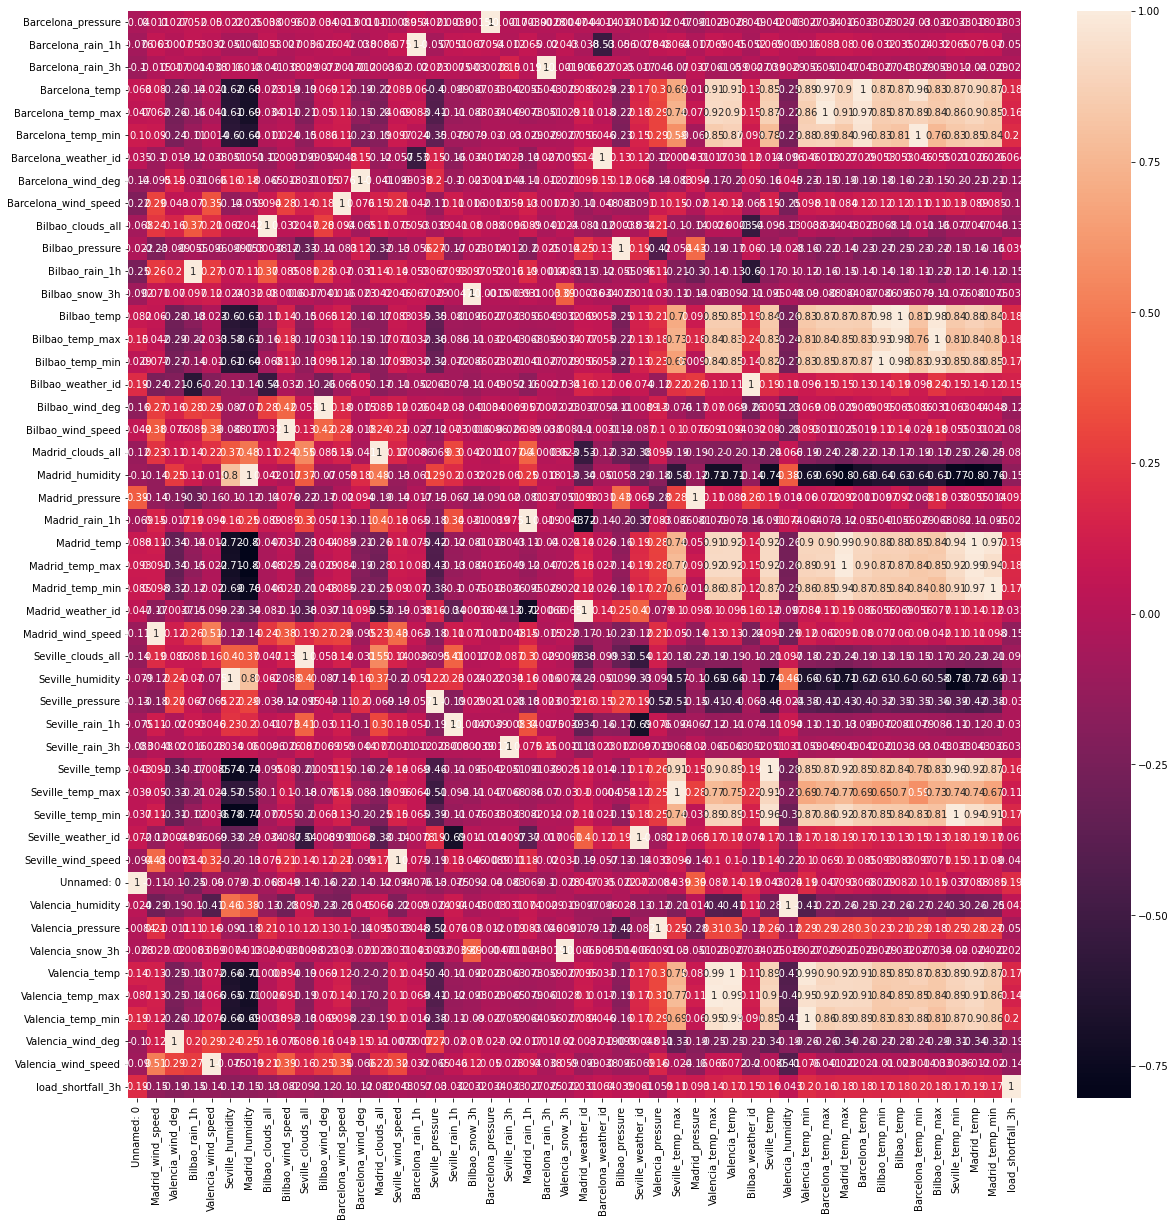

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr().sort_index(), annot=True)

##### From the above `correlation heatmap`, it could be deduced that:

i. `Temperatures` are mostly `negatively correlated` with `Humidity`. Meaning as Temperatures increases across one part of the city, humidity decreases there too.


ii. `Atmospheric Pressure` were similarly observed to be negatively correlated with `Temperatures`. Meaning as Atmospheric Pressure increases, so does Temperatures


iii. `Rainfall` was similarly observed to be moderately positively correlated with `Cloud coverings` and `Humidity` across the cities. Meaning the denser the cloud covering and/or relative humidity, the higher the chances for downpour

iv. `Rainfall` was also observed to exhibit a negative correlation with `Weather` condition

#### With these discovereies, we can proceed to extracting some more insights through visuals

<AxesSubplot:xlabel='load_shortfall_3h', ylabel='Count'>

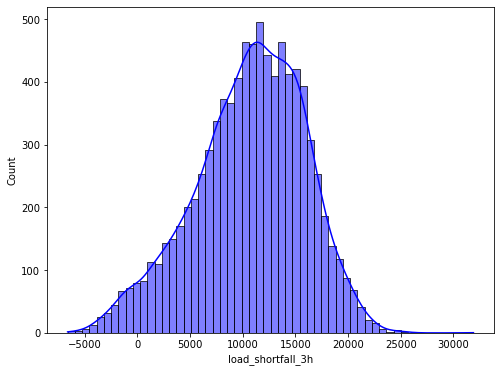

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(data=train_df, x=train_df['load_shortfall_3h'], kde=True, color='blue')

##### First inspecting the target column, we discovered that the `load_shortfall_3h` data is normally distributed with slight skew to the left

<AxesSubplot:ylabel='Count'>

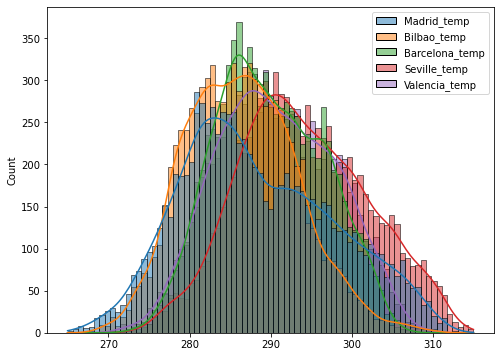

In [31]:
city_temps = train_df[['Madrid_temp', 'Bilbao_temp', 'Barcelona_temp','Seville_temp', 'Valencia_temp']]
plt.figure(figsize=(8,6))
sns.histplot(data=city_temps, kde=True)

##### From the chart above, it could be deduced that `Seville`, `Barcelona` and `Bilbao` tend to have the mean highest temperatures among the 5 Spanish cities, over the course of the year.

##### This could be butressed by the `Jointplot` below

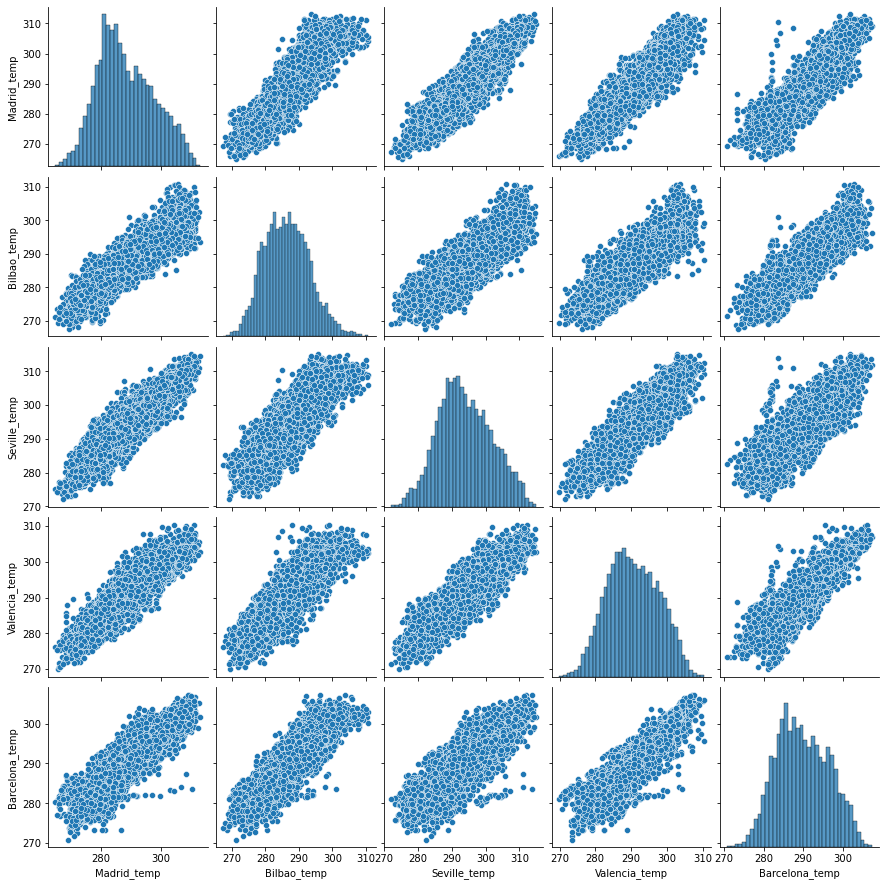

In [32]:
city_temps = train_df[['Madrid_temp', 'Bilbao_temp','Seville_temp', 'Valencia_temp', 'Barcelona_temp']]

sns.pairplot(data=city_temps)

##### Taking a look at the `Maximum Temperatures` across the cities, `Seville`, `Valencia` and `Barcelona` tend to have the highest set of temperatures among all of the Spanish cities

##### This discovery is in consonance with the previous `Histogram Temperature` chart

<AxesSubplot:>

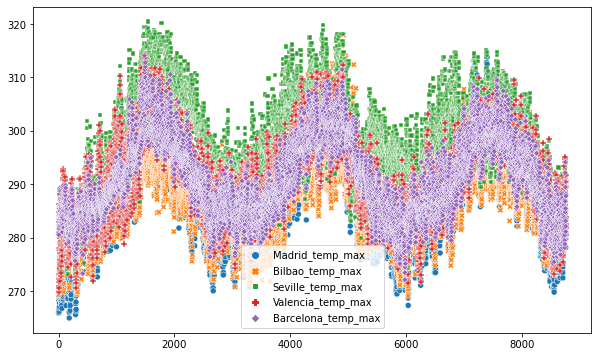

In [33]:
city_temps = train_df[['Madrid_temp_max', 'Bilbao_temp_max','Seville_temp_max', 'Valencia_temp_max', 'Barcelona_temp_max']]
plt.figure(figsize=(10,6))

sns.scatterplot(data=city_temps, legend=1)

##### Now taking a look at the `Wind_speed` column...

<AxesSubplot:ylabel='Count'>

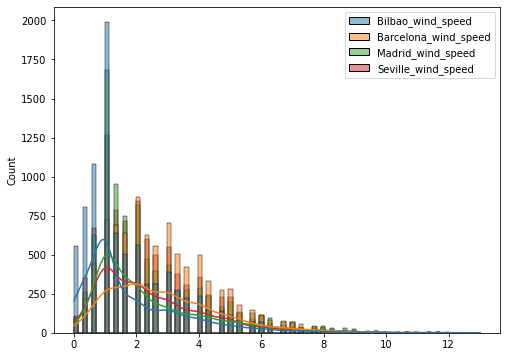

In [34]:
city_temps = train_df[['Bilbao_wind_deg', 'Barcelona_wind_deg']]
plt.figure(figsize=(8,6))
sns.histplot(data = train_df[['Bilbao_wind_speed','Barcelona_wind_speed',
                              'Madrid_wind_speed', 'Seville_wind_speed']], kde=True)

##### From the above `Histogram`, it could be deduced that the cities of `Bilbao`, `Barcelona` and `Madrid` tend to have the highest set of wind speed among the recorded Spanish cities.


##### This discovery is also in accrodance with the `Scatterplot` below

<AxesSubplot:>

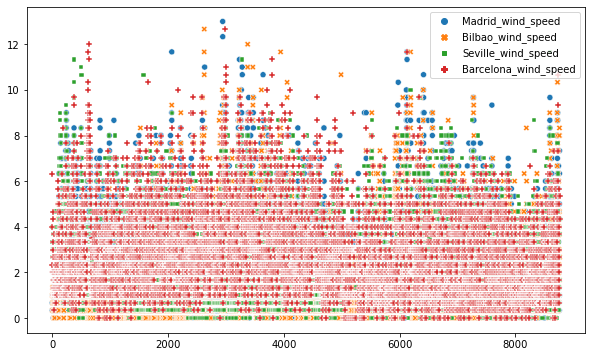

In [35]:
city_wind_speed = train_df[['Madrid_wind_speed', 'Bilbao_wind_speed','Seville_wind_speed', 'Barcelona_wind_speed']]
plt.figure(figsize=(10,6))

sns.scatterplot(data=city_wind_speed)

# Model Building

##### We begin defining the `features` and `target` variables from the train set

In [36]:
# Features
X = train_df.drop(['load_shortfall_3h', 'Unnamed: 0', 'time'], axis=1) 

# Response variable
y = train_df['load_shortfall_3h'] 

In [37]:
# Training the model on the features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42) 

In [38]:
# Instantiating the Linear models

lasso = Lasso()
elast = ElasticNet()
linr = LinearRegression()
dtree = DecisionTreeRegressor()

In [39]:
# Fitting the linear model

linr.fit(X_train, y_train)

LinearRegression()

In [40]:
# Fitting the Lasso model

lasso.fit(X_train, y_train)

Lasso()

In [41]:
# Fitting the Decision Tree model

dtree.fit(X_train, y_train) 

DecisionTreeRegressor()

In [42]:
elast.fit(X_train, y_train)

ElasticNet()

##### At this point, we `build a function` which is capable of calculating the `Root Mean Squared Error (RMSE)` of any built model

In [43]:
def rmse(model):
    pred = model.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

    return rmse

In [44]:
rmse(linr)

4910.942571359732

In [45]:
rmse(lasso)

4913.0679159979345

In [46]:
rmse(elast)

4921.50713116524

In [47]:
rmse(dtree)

6459.272496913903

##### From the above attmpted linear models, it could be seen that the `Linear Model` seem to be the most efficient of all with the least RMSE

### Now we introduce `Ensemble` techniques by `combining previous linear models` in order to get a much efficient predictor

##### We begin with the `Votting` method

In [48]:
models = [('linear',linr), ('lasso',lasso), ('elast', elast), ('dtree', dtree)]
votr = VotingRegressor(estimators=models, weights=[.1, .1, .2, .3])

In [49]:
votr.fit(X_train, y_train)

VotingRegressor(estimators=[('linear', LinearRegression()), ('lasso', Lasso()),
                            ('elast', ElasticNet()),
                            ('dtree', DecisionTreeRegressor())],
                weights=[0.1, 0.1, 0.2, 0.3])

In [50]:
rmse(votr)

4900.903723253243

##### Next is the `Stacking Ensemble` method

In [51]:
stakr = StackingRegressor(estimators=models, final_estimator=linr) 

In [52]:
stakr.fit(X_train, y_train)

StackingRegressor(estimators=[('linear', LinearRegression()),
                              ('lasso', Lasso()), ('elast', ElasticNet()),
                              ('dtree', DecisionTreeRegressor())],
                  final_estimator=LinearRegression())

In [53]:
rmse(stakr)

4821.362120801365

##### `Bagging` is next

In [54]:
bagr = BaggingRegressor(n_estimators=200, base_estimator=dtree)

In [55]:
bagr.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=200)

In [56]:
rmse(bagr)

4336.697078512379

##### Let's attempt `XGBoost`

In [57]:
xgb = XGBRegressor(n_estimators=200, random_state=42)

In [58]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [59]:
rmse(xgb)

4401.514041213861

##### `Boosting` Ensemble technique is next

In [60]:
boor = AdaBoostRegressor(base_estimator=dtree, n_estimators=200)

In [61]:
boor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=200)

In [62]:
rmse(boor) #The most efficient model

4257.672006778838

##### And finally we attempt `RandomForest`

In [63]:
randr = RandomForestRegressor(n_estimators=200)

In [64]:
randr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [65]:
rmse(randr)

4317.833459818982

### From all 5 `Ensemble` methods attempted above, the `Boosting` method seem to be the most efficient method with the least RMSE value

##### At this point, we replicate every transformation made to the train set, on the test set too

##### Beginning with filling of missing values and then datatype conversion

In [66]:
test_df['Valencia_pressure'].isnull().sum()

454

In [67]:
test_df['Valencia_wind_deg']

0        level_8
1        level_8
2        level_7
3        level_7
4        level_7
          ...   
2915     level_9
2916     level_8
2917     level_6
2918     level_6
2919    level_10
Name: Valencia_wind_deg, Length: 2920, dtype: object

In [68]:
test_df['Seville_pressure']

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
2915    sp24
2916    sp24
2917    sp23
2918    sp23
2919    sp23
Name: Seville_pressure, Length: 2920, dtype: object

In [69]:
# Replacing of missing values on the train columns
test_df['Valencia_pressure'] = test_df['Valencia_pressure'].replace(np.nan, 0)

# Datatype conversions
test_df['Valencia_wind_deg'] = test_df['Valencia_wind_deg'].str.extract('(\d+)')
test_df['Valencia_wind_deg'] = pd.to_numeric(test_df['Valencia_wind_deg'])
test_df['Seville_pressure'] = test_df['Seville_pressure'].str.extract('(\d+)')
test_df['Seville_pressure'] = pd.to_numeric(test_df['Seville_pressure'])

# And finally defining the feature columns
test_df = test_df.drop(['Unnamed: 0', 'time'], axis = 1)

##### And we have our cleaned `Test` data as appeared below

In [70]:
test_df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


##### Since we've been able to establish that the `Boosting`  ensemble method is the most efficient method, we can proceed to applying it to make predictions on the `Test` data

In [71]:
preds = boor.predict(test_df)
preds

array([10012.        , 10018.66666667, 11949.33333333, ...,
       12258.33333333, 13207.66666667,  9578.33333333])

##### Next we can put our predictions into a tabular format along with their respective times

In [72]:
sample_df = pd.read_csv('Dataset/sample_submission_load_shortfall.csv')

In [73]:
output = pd.DataFrame({'time':sample_df['time'], 'load_shortfall_3h':preds})

In [74]:
output.head()

,time,load_shortfall_3h
0,01/01/2018 00:00,10012.000000
1,01/01/2018 03:00,10018.666667
2,01/01/2018 06:00,11949.333333
3,01/01/2018 09:00,10426.000000
4,01/01/2018 12:00,11872.666667


##### And now we convert the `Output` into a .csv file format

In [75]:
output.to_csv

<bound method NDFrame.to_csv of                   time  load_shortfall_3h
0     01/01/2018 00:00       10012.000000
1     01/01/2018 03:00       10018.666667
2     01/01/2018 06:00       11949.333333
3     01/01/2018 09:00       10426.000000
4     01/01/2018 12:00       11872.666667
...                ...                ...
2915  31/12/2018 09:00        7943.666667
2916  31/12/2018 12:00       11620.000000
2917  31/12/2018 15:00       12258.333333
2918  31/12/2018 18:00       13207.666667
2919  31/12/2018 21:00        9578.333333

[2920 rows x 2 columns]>

In [76]:
output.to_csv('predict_submission.csv', index=False)

##### And voila! We're good!

# Recommendations and Conclusions

#### As seen from the EDA and visualizations...

i. `Temperatures` are mostly `negatively` `correlated` with ` Relative Humidity` across any of the 5 Spanish cities. Meaning the higher the temperature, the lower the humudity.


ii. `Rainfall` is similarly observed to be moderately positively correlated with `Cloud coverings` and `Humidity` across the cities. Meaning denser cloud covers and/or relative humidity, might imply higher chances of downpour


iii. `Atmospheric Pressure` were similarly observed to be negatively correlated with `Temperatures`. Meaning as Atmospheric Pressure increases, so does Temperatures

iv. `Rainfall` was also observed to exhibit a negative correlation with `Weather` condition


##### The below are a couple `recommendations` 

i. Though exhibiting a fluctuating trend, `Maximum Temperatures` presumably as a result of insense sunshine, seem to be commonly experienced across `Seville`, `Barcelona` and `Bilbao`. Hence, installing `solar plants` will go a long way in helping harness this sustainable energy alternatives and transitionaning away from the fossil based energy generation across the country.


ii. Looking at the `wind speed` data, `Bilbao`, `Barcelona` and `Madrid` tend to have most active wind activities. Hence, it would be highly recommended that `Wind vanes` be installed in these cities in order explore this renewable energy sources and help transtion from fossil fuels


iii. In as much as the `Linear Regression` was more efficient compared to the rest of the other `Linear Models`, The `Boosting Ensembling` method tend to be most efficient as a result of its least RMSE value than any other method attempted.Hence, was chosen for predicting `load_shortfall_3h` for any point in time across the 5 Spanish cities.